HW3

zhao xinyi 19307110452

2022.4.8

In [1]:
# problem 1
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2


In [47]:
def smoothing(img, len_patch,method):
    [height, width]=img.shape
    newImg = np.zeros([height,width],np.float64)
    half_length = (len_patch - 1) // 2 # half of patch length
    kernel = np.ones([len_patch,len_patch],np.float64)
    tempImg = np.zeros((height + len_patch - 1, width + len_patch - 1)) # temp matrix for convenient calculation
    tempImg[half_length: height + half_length, half_length: width + half_length] = img

    if method == 'mean':
        kernel = kernel*1.0/(len_patch*len_patch) # kernel for mean algorithm
    if method == 'gauss':
        x, y = np.meshgrid(np.arange(len_patch), np.arange(len_patch)) 
        sigma = 20
        mu = half_length
        kernel = np.exp(-((x - mu)**2 + (y - mu)**2) / (2*sigma**2))   
        kernel /= kernel.sum()  # gaussian kernel

    for i in range(half_length, height+half_length):    
        for j in range(half_length, width+half_length): # for all x, y in temp img
            if method == 'median': # choose the median of patch, without kernel
                tempImg[i][j] = np.median(tempImg[i - half_length:i + half_length + 1,\
                                         j - half_length:j + half_length + 1]) 
            else: #else: convolution
                tempImg[i][j] = np.sum(kernel * tempImg[i - half_length:i + half_length + 1,\
                                               j - half_length:j + half_length + 1])

    newImg = tempImg[half_length:height + half_length, half_length:width + half_length]
    return newImg


In [50]:
def plotImage(img,meanImg,gaussImg, medianImg):
    
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("original image")

    plt.subplot(2, 2, 2)
    plt.imshow(meanImg, cmap="gray")
    plt.axis("off")
    plt.title("mean")

    plt.subplot(2, 2, 3)
    plt.imshow(gaussImg, cmap="gray")
    plt.axis("off")
    plt.title("gaussian")

    plt.subplot(2, 2, 4)
    plt.imshow(medianImg, cmap="gray")
    plt.axis("off")
    plt.title("median")
    plt.show()

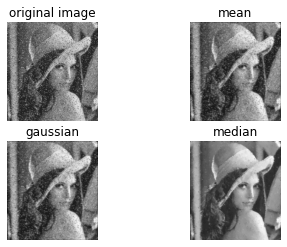

In [56]:
img = cv2.imread('noise.jpg', cv2.IMREAD_GRAYSCALE) 
len_patch=5
meanImg = smoothing(img, len_patch, method='mean')
gaussImg = smoothing(img, len_patch, method='gauss')
medianImg = smoothing(img, len_patch, method='median')

plotImage(img,meanImg,gaussImg,medianImg)

In [55]:
def Laplace(img, len_patch, w):
    [height, width]=img.shape
    newImg = np.zeros([height,width],np.float64)
    half_length = (len_patch - 1) // 2 # half of patch length
    kernel = np.ones([len_patch,len_patch])
    tempImg = np.zeros((height + len_patch - 1, width + len_patch - 1)) # temp matrix for convenient calculation
    tempImg[half_length: height + half_length, half_length: width + half_length] = img
    new_height, new_width = tempImg.shape 

    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  # laplace operator
    hessian = np.zeros((new_height, new_width))     # Second derivative
    for i in range(half_length, new_height - half_length):  # for all x, y in temp img
        for j in range(half_length, new_width - half_length):
            hessian[i][j] = np.sum(kernel * tempImg[i - half_length:i + half_length + 1, j - half_length:j + half_length + 1]) #convolution
    tempImg = tempImg - w * hessian     # tempImg - hessian matrix
    newImg = tempImg[half_length:new_height - half_length, half_length:new_width - half_length]  # new img
    newImg = (newImg - newImg.min()) / (newImg.max() - newImg.min()) * 255  # restrict to [0, 255]
    return newImg

In [44]:
def plotImage(img,Img1,Img2, Img3):
    
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("original image")

    plt.subplot(2, 2, 2)
    plt.imshow(Img1, cmap="gray")
    plt.axis("off")
    plt.title("w=0.5")

    plt.subplot(2, 2, 3)
    plt.imshow(Img2, cmap="gray")
    plt.axis("off")
    plt.title("w=1")

    plt.subplot(2, 2, 4)
    plt.imshow(Img3, cmap="gray")
    plt.axis("off")
    plt.title("w=5")


In [49]:
def highboost(img, len_patch, k):
    f_bar = smoothing(img, len_patch,'mean') # calculate f_bar
    mask = img-f_bar.astype(int)
    newImg = img + k * mask # new img
    newImg = (newImg - newImg.min()) / (newImg.max() - newImg.min()) * 255  # restrict to [0, 255]
    return newImg

0.0
0.0
0.0


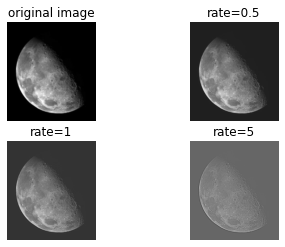

In [56]:
img = cv2.imread('moon.jpg', cv2.IMREAD_GRAYSCALE) 
len_patch=3
Img1 = Laplace(img, len_patch, 0.5)
Img2 = Laplace(img, len_patch, 1)
Img3 = Laplace(img, len_patch, 5)

plotImage(img,Img1, Img2, Img3)

Text(0.5, 1.0, 'k=20')

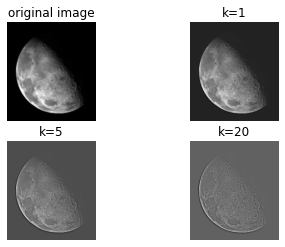

In [42]:
img = cv2.imread('moon.jpg', cv2.IMREAD_GRAYSCALE) 
len_patch=5
Img1 = highboost(img, len_patch=5, k=1)
Img2 = highboost(img, len_patch=5, k=5)
Img3 = highboost(img, len_patch=5, k=20)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("original image")

plt.subplot(2, 2, 2)
plt.imshow(Img1, cmap="gray")
plt.axis("off")
plt.title("k=1")

plt.subplot(2, 2, 3)
plt.imshow(Img2, cmap="gray")
plt.axis("off")
plt.title("k=5")。

plt.subplot(2, 2, 4)
plt.imshow(Img3, cmap="gray")
plt.axis("off")
plt.title("k=20")